**Title: "A Guide to Causality and Its Application in Finance"**

**Causality**  
Causality refers to the relationship between two events or phenomena where one (the cause) leads to the production or occurrence of another (the effect). In this relationship, the cause is considered partly responsible for the effect, while the effect depends on the cause to some extent. A process typically has multiple causes, also called causal factors, all of which are found in its past. In turn, an effect may become a cause for other effects, which will occur in its future.

**Causal Inference**  
Causal inference is an academic discipline that focuses on how to make causal conclusions from data. It involves understanding the assumptions, study designs, and estimation techniques needed to draw these conclusions accurately. Recently, causal inference has advanced significantly, especially with the introduction of Judea Pearl's Causal Diagrams (also known as Directed Acyclic Graphs, or DAGs) and Rubin's Causal Model. These frameworks provide a systematic way to analyze and model causal relationships, enabling researchers to better understand how variables interact and influence one another.

**Causal Inference in Finance**  
In finance, causal inference methods are applied to understand how various factors—such as economic policies, events, or market trends—affect financial outcomes like asset prices, market volatility, investment returns, and economic indicators. By identifying cause-and-effect relationships, financial professionals and researchers can make more informed decisions, devise effective strategies, and create well-grounded economic policies. Causal inference is especially helpful in answering key questions about how different variables in the financial ecosystem are interconnected.

**The Importance of Causal Inference in Finance**  
Causal inference plays a crucial role in finance for several reasons, particularly in helping stakeholders understand the cause-and-effect relationships between financial variables. This understanding is essential for effective decision-making, risk management, policy formulation, and developing investment strategies. Here are some key reasons why causal inference is indispensable in the financial world:

- **Investment Decisions:** Investors rely on causal inference to predict the effects of factors like interest rate changes, inflation, and geopolitical events on asset prices and returns. This understanding enables them to make more informed and strategic investment decisions.
  
- **Policy Analysis:** Policymakers use causal inference to evaluate the impact of changes in fiscal or monetary policies on the economy, financial markets, and specific sectors. It allows them to assess the success of these policies and make necessary adjustments.
  
- **Risk Management:** Financial institutions use causal analysis to identify the root causes of market volatility and credit risk. By understanding what triggers market downturns or financial distress, they can improve their risk management and mitigation strategies.
  
- **Performance Attribution:** Asset managers use causal inference to decompose the sources of investment performance, helping them distinguish between returns driven by market trends, economic events, or their own skill.
  
- **Market Regulation:** Regulators apply causal inference to understand how regulatory changes impact financial markets and institutions. This knowledge is vital for ensuring that regulations achieve their intended goals and don’t lead to unintended consequences.
  
- **Product Development and Pricing:** Financial institutions utilize causal analysis to gauge demand for financial products and understand the factors that influence pricing. This helps them develop competitive financial products and set optimal prices.
  
- **Economic Forecasting:** Causal inference plays a significant role in forecasting the effects of economic shocks, policy changes, or innovations on growth, inflation, and unemployment rates. It helps anticipate future economic trends and outcomes.
  
- **Behavioral Finance:** Understanding the causal drivers of investor behavior, including the influence of psychological biases, can improve financial advice and the design of products that better align with investor needs.

In summary, causal inference is a foundational tool in finance that enables professionals to make data-driven decisions, manage risks, create sound policies, and develop effective investment strategies.

__Importing all the required Libraries__

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx

In [2]:
nse_data = pd.read_csv("/content/NSE (1).csv")
ads_index = pd.read_excel('/content/ads_index (2).xlsx')

In [3]:
nse_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,25/03/2019,11395.65039,11395.65039,11311.59961,11354.25000,11354.25000,294500.0
1,26/03/2019,11375.20020,11496.75000,11352.45020,11483.25000,11483.25000,282600.0
2,27/03/2019,11531.45020,11546.20020,11413.00000,11445.04981,11445.04981,350400.0
3,28/03/2019,11463.65039,11588.50000,11452.45020,11570.00000,11570.00000,527700.0
4,01/04/2019,11665.20020,11738.09961,11644.75000,11669.15039,11669.15039,379600.0


In [4]:
ads_index.head()

,Date,ADS_Index
0,2019-03-25,-0.365959
1,2019-03-26,-0.378829
2,2019-03-27,-0.393147
3,2019-03-28,-0.408918
4,2019-03-29,-0.426147


__Converting dataset into date time frame__

In [5]:
nse_data['Date'] = pd.to_datetime(nse_data['Date'])

<ipython-input-5-4911edfa00f5>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nse_data['Date'] = pd.to_datetime(nse_data['Date'])


In [6]:
ads_index.head()

,Date,ADS_Index
0,2019-03-25,-0.365959
1,2019-03-26,-0.378829
2,2019-03-27,-0.393147
3,2019-03-28,-0.408918
4,2019-03-29,-0.426147


In [7]:
nse_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-03-25,11395.65039,11395.65039,11311.59961,11354.25000,11354.25000,294500.0
1,2019-03-26,11375.20020,11496.75000,11352.45020,11483.25000,11483.25000,282600.0
2,2019-03-27,11531.45020,11546.20020,11413.00000,11445.04981,11445.04981,350400.0
3,2019-03-28,11463.65039,11588.50000,11452.45020,11570.00000,11570.00000,527700.0
4,2019-04-01,11665.20020,11738.09961,11644.75000,11669.15039,11669.15039,379600.0


In [8]:
nse_data.isnull().sum()

,0
Date,0
Open,2
High,2
Low,2
Close,2
Adj_Close,2
Volume,2


In [9]:
mean_values = nse_data[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']].mean()

# Fill missing values in these columns with their respective means
nse_data.fillna(mean_values, inplace=True)

# Check to ensure no more missing values exist
print(nse_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64


In [10]:
ads_index.isnull().sum()

,0
Date,0
ADS_Index,0


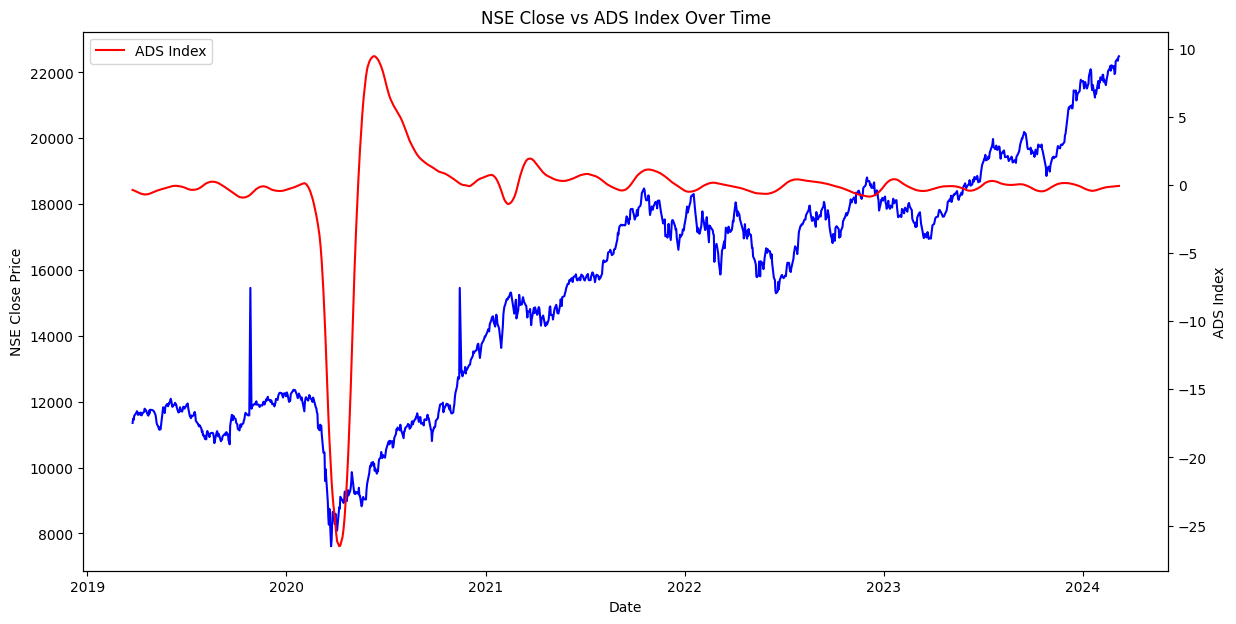

In [11]:
nse_data = nse_data[['Date', 'Close']]
ads_index = ads_index[['Date', 'ADS_Index']]

# Merge datasets on the 'Date' column
data_merged = pd.merge(nse_data, ads_index, on='Date', how='inner')
plt.figure(figsize=(14,7))
plt.plot(data_merged['Date'], data_merged['Close'], label='NSE Close', color='blue')
plt.xlabel('Date')
plt.ylabel('NSE Close Price')
plt.twinx()
plt.plot(data_merged['Date'], data_merged['ADS_Index'], label='ADS Index', color='red')
plt.ylabel('ADS Index')
plt.title('NSE Close vs ADS Index Over Time')
plt.legend(loc='upper left')
plt.show()

**Calculating the Pearson Correlation Coefficient**

The Pearson correlation coefficient, denoted as **r**, is a statistical measure used to assess the linear relationship between two variables. It quantifies the strength and direction of the relationship. The value of the Pearson correlation coefficient ranges from -1 to 1, where:

- **1** indicates a perfect positive linear relationship, meaning that as one variable increases, the other variable also increases in a perfectly consistent manner.
- **-1** indicates a perfect negative linear relationship, meaning that as one variable increases, the other variable decreases in a perfectly consistent manner.
- **0** indicates no linear relationship between the variables, meaning that changes in one variable do not systematically relate to changes in the other.

A correlation coefficient close to **1** or **-1** suggests a strong linear relationship between the two variables, while a coefficient close to **0** indicates a weak or no linear relationship.

In [12]:
# Calculate Pearson correlation coefficient
correlation_coef, p_value = pearsonr(data_merged['Close'], data_merged['ADS_Index'])
print(f'Pearson correlation coefficient: {correlation_coef:.2f}')



Pearson correlation coefficient: 0.14


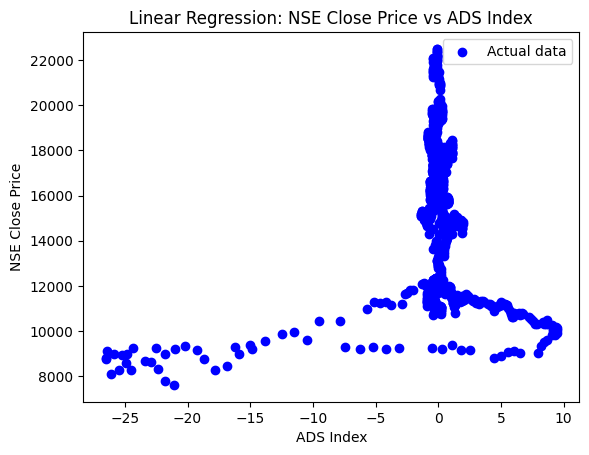

Model Coefficients: [122.59526631]
Model Intercept: 15428.763674729102


In [13]:
# Prepare the data for modeling
X = data_merged[['ADS_Index']]
y = data_merged['Close']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
# plt.plot(X, predictions, color='red', linewidth=2, label='Fitted line')
plt.xlabel('ADS Index')
plt.ylabel('NSE Close Price')
plt.title('Linear Regression: NSE Close Price vs ADS Index')
plt.legend()
plt.show()

print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')


**Model Coefficients in Linear Regression**

In the context of linear regression, the model coefficient represents the slope of the line that describes the relationship between the independent variable(s) and the dependent variable. It indicates the change in the dependent variable for a one-unit increase in the independent variable, while holding all other variables constant (in the case of multiple regression).

For example, if a linear regression model is used to predict house prices based on size (in square feet), and the coefficient for size is **300**, this means that for every additional square foot of size, the price of the house is expected to increase by **$300**, assuming other factors remain unchanged.

Coefficients are crucial for interpreting the results of regression analysis, as they reveal both the magnitude and direction of the relationship between each independent variable and the dependent variable.

In [14]:
nse_data.set_index('Date', inplace=True)
ads_index.set_index('Date', inplace=True)

**Granger Causality Test**

The Granger Causality Test is used to determine whether one time series can predict another, commonly applied in economic and financial time series analysis. It examines whether past values of one variable provide useful information for predicting the future values of another variable.

**Predictive Causality:** The test evaluates if the historical data of one variable can help predict the future behavior of another variable.

**Lag Length:** The test requires selecting the number of lags for the influencing variable to include in the model. The choice of lag length can impact the test results, and it is typically chosen based on criteria such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC).

**Statistical Test:** The test utilizes regression models, often with F-tests, to compare models that include and exclude lagged terms of the supposed causal variable.

The Granger Causality Test is widely used in fields like econometrics, finance, neuroscience, and other areas involving time series data analysis.

In [15]:
# This step would normally be part of merging, but since we're not merging:
common_dates = nse_data.index.intersection(ads_index.index)
nse_close = nse_data.loc[common_dates, 'Close']  # Assuming 'Close' column exists
ads_index_series = ads_index.loc[common_dates, 'ADS_Index']  # Assuming 'ADS_Index' column exists

# Combine into a single DataFrame for the Granger causality test
combined_data = pd.concat([nse_close, ads_index_series], axis=1)


In [16]:
# This step would normally be part of merging, but since we're not merging:
common_dates = nse_data.index.intersection(ads_index.index)
nse_close = nse_data.loc[common_dates, 'Close']  # Assuming 'Close' column exists
ads_index_series = ads_index.loc[common_dates, 'ADS_Index']  # Assuming 'ADS_Index' column exists

# Combine into a single DataFrame for the Granger causality test
combined_data = pd.concat([nse_close, ads_index_series], axis=1)


In [17]:
# The maxlag parameter can be adjusted based on your data's frequency and size
granger_result = grangercausalitytests(combined_data, maxlag=4, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7808  , p=0.3771  , df_denom=1222, df_num=1
ssr based chi2 test:   chi2=0.7827  , p=0.3763  , df=1
likelihood ratio test: chi2=0.7825  , p=0.3764  , df=1
parameter F test:         F=0.7808  , p=0.3771  , df_denom=1222, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0045  , p=0.1352  , df_denom=1219, df_num=2
ssr based chi2 test:   chi2=4.0255  , p=0.1336  , df=2
likelihood ratio test: chi2=4.0189  , p=0.1341  , df=2
parameter F test:         F=2.0045  , p=0.1352  , df_denom=1219, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9033  , p=0.0338  , df_denom=1216, df_num=3
ssr based chi2 test:   chi2=8.7601  , p=0.0327  , df=3
likelihood ratio test: chi2=8.7289  , p=0.0331  , df=3
parameter F test:         F=2.9033  , p=0.0338  , df_denom=1216, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3903  , p=0.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


__Interest Rate vs Nifty returns over the years__

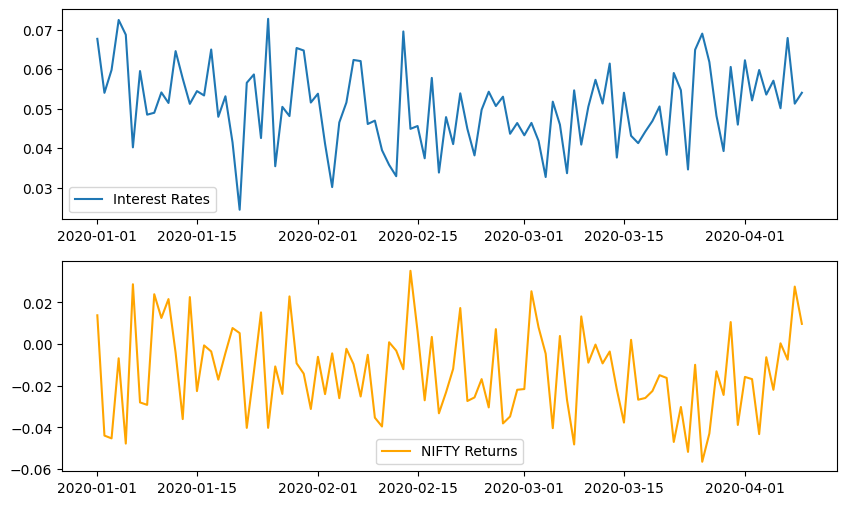

                            OLS Regression Results                            
Dep. Variable:           NiftyReturns   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.724
Date:                Tue, 03 Dec 2024   Prob (F-statistic):              0.192
Time:                        04:43:28   Log-Likelihood:                 246.53
No. Observations:                 100   AIC:                            -489.1
Df Residuals:                      98   BIC:                            -483.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.322e-05      0.011      0.003   

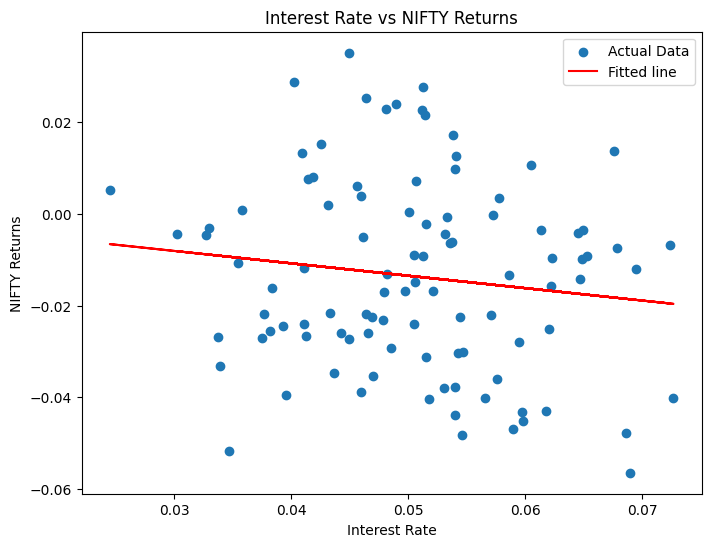

In [18]:
np.random.seed(0)
dates = pd.date_range('20200101', periods=100)
interest_rates = np.random.normal(0.05, 0.01, 100)
nifty_returns = -0.5 * interest_rates + np.random.normal(0.01, 0.02, 100)
df = pd.DataFrame({'Date': dates, 'InterestRate': interest_rates, 'NiftyReturns': nifty_returns})
df.set_index('Date', inplace=True)

# Visualizing the data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['InterestRate'], label='Interest Rates')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df.index, df['NiftyReturns'], label='NIFTY Returns', color='orange')
plt.legend()
plt.show()

# Preparing data for linear regression
X = sm.add_constant(df['InterestRate'])  # Adds a constant term to the predictor
y = df['NiftyReturns']

# Applying linear regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Summary of the model
print(model.summary())

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['InterestRate'], df['NiftyReturns'], label='Actual Data')
plt.plot(df['InterestRate'], predictions, color='red', label='Fitted line')
plt.xlabel('Interest Rate')
plt.ylabel('NIFTY Returns')
plt.title('Interest Rate vs NIFTY Returns')
plt.legend()
plt.show()


**Directed Acyclic Graph (DAG)**

A Directed Acyclic Graph (DAG) is a key concept in computer science and statistics, especially in the field of causal inference. It is used to model relationships between variables and is instrumental in statistical analysis.

- **Directed:** A DAG consists of nodes connected by edges, where each edge has a direction, indicating a causal relationship. An edge points from one node (the cause) to another (the effect).
  
- **Acyclic:** A DAG does not contain any cycles, meaning you cannot start at one node and follow a sequence of edges that leads back to the original node. This ensures there are no circular or paradoxical relationships, which is essential for representing causal processes.

- **Graph:** A DAG is composed of nodes (vertices) connected by edges (arrows), representing relationships or interactions between the variables.

### Why is it Used?

- **Modeling Causal Relationships:** DAGs are used in statistics and epidemiology to represent and analyze causal relationships between variables, helping researchers understand how one variable influences another.

- **Avoiding Confounding Bias:** DAGs are particularly useful in identifying confounders—variables that influence both the cause and the effect, potentially skewing results. By visualizing the relationships, DAGs help in designing studies that more accurately assess causality.

- **Clarifying Assumptions:** DAGs make the assumptions about causal relationships between variables explicit, providing a clear and visual representation of these assumptions, which is essential for understanding the analysis.

- **Informing Statistical Analysis:** DAGs help guide the selection of variables to include in statistical models. By understanding the causal paths, researchers can decide which variables to adjust for, improving the accuracy of their analysis.

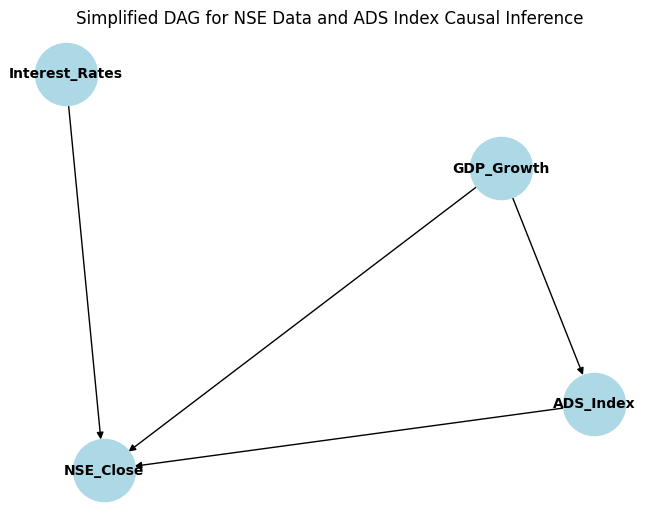

In [19]:
# Create a Directed Graph
dag = nx.DiGraph()

# Add nodes with the variable names
dag.add_nodes_from(["ADS_Index", "NSE_Close", "Interest_Rates", "GDP_Growth"])

# Add edges to represent assumed causal directions
dag.add_edge("ADS_Index", "NSE_Close")
dag.add_edge("Interest_Rates", "NSE_Close")
dag.add_edge("GDP_Growth", "NSE_Close")
dag.add_edge("GDP_Growth", "ADS_Index")  # Assuming GDP growth influences ADS Index

# Draw the DAG
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Simplified DAG for NSE Data and ADS Index Causal Inference')
plt.show()


**Directed Acyclic Graph (DAG) in the Financial Context**

The Directed Acyclic Graph (DAG) in the previous example serves as a simplified representation of the potential causal relationships between the Aruoba-Diebold-Scotti (ADS) Index, the closing prices of the National Stock Exchange (NSE) of India, and other economic factors such as interest rates and GDP growth. Let's break down the components and the rationale behind this DAG:

### **Nodes:**
Each node in the DAG represents a variable that could influence the financial markets or is an outcome of such influences. In this example, there are four nodes:

- **ADS_Index:** This node represents the Aruoba-Diebold-Scotti (ADS) Business Conditions Index, which is an economic indicator used to assess the overall health of the economy.
  
- **NSE_Close:** This node represents the closing price of the NSE, which is the main outcome variable of interest. It is assumed that various factors, such as economic indicators, could influence stock prices.

- **Interest_Rates:** This node represents the prevailing interest rates. Interest rates have a significant impact on financial markets, with higher rates typically reducing the attractiveness of stocks compared to bonds, potentially leading to lower stock prices.

- **GDP_Growth:** This node represents the growth rate of the Gross Domestic Product (GDP), a key measure of the economy's health. A higher GDP growth rate usually correlates with increased business profits, which may drive up stock prices.

### **Edges:**
The directed edges (arrows) represent assumed causal relationships or influences between the variables. These relationships are based on economic theory, empirical research, or domain knowledge:

- **ADS_Index → NSE_Close:** This arrow represents the hypothesis that changes in the ADS Index, which reflects business conditions, can influence movements in NSE stock prices. For example, an improvement in business conditions may lead to higher stock prices.

- **Interest_Rates → NSE_Close:** This edge indicates that interest rates might directly affect NSE stock prices. Generally, higher interest rates can lower stock prices by increasing borrowing costs for companies and making bonds more attractive to investors, potentially diverting investment away from stocks.

- **GDP_Growth → NSE_Close:** This edge suggests that economic growth, measured by GDP growth, could influence stock prices. Strong economic growth can lead to higher corporate earnings, which may positively impact stock prices.

- **GDP_Growth → ADS_Index:** This edge represents the hypothesis that overall economic growth influences the business conditions captured by the ADS Index. Stronger economic growth typically improves business conditions, which would be reflected in the ADS Index.

This DAG visually and conceptually represents the potential causal pathways through which economic indicators and factors might influence stock market behavior.

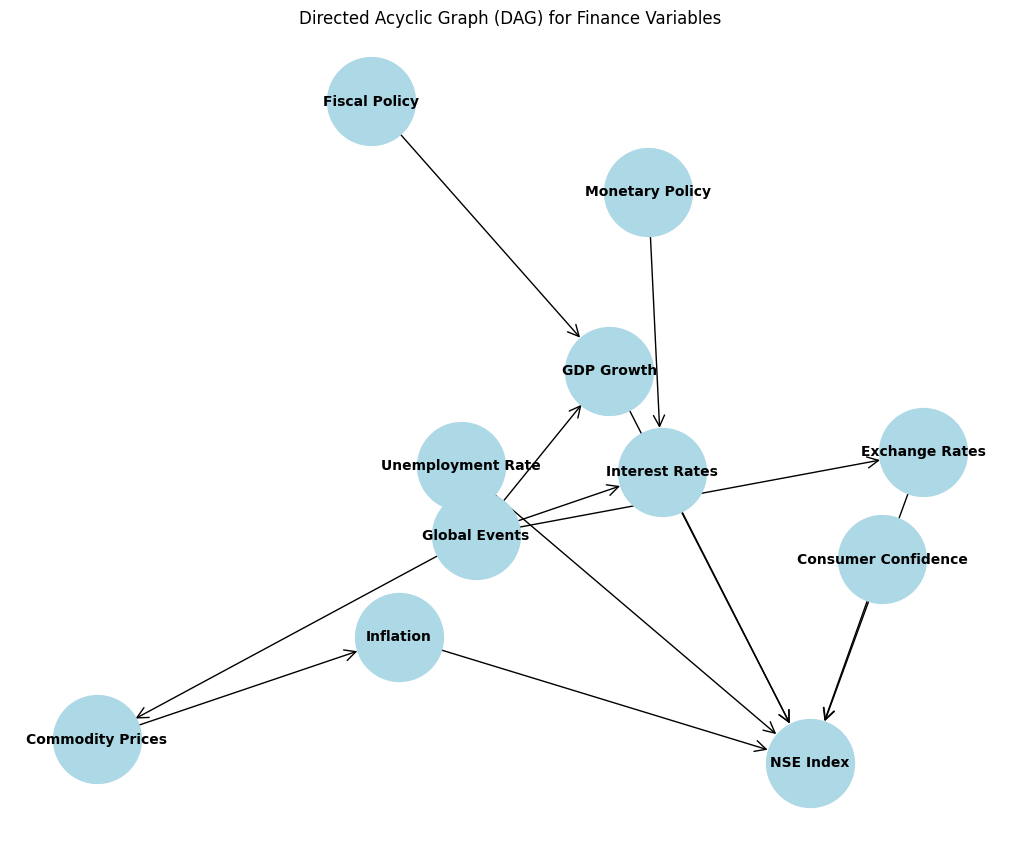

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their full forms as labels
nodes = {
    "IR": "Interest Rates",
    "INF": "Inflation",
    "ER": "Exchange Rates",
    "GDP": "GDP Growth",
    "UNEMP": "Unemployment Rate",
    "CC": "Consumer Confidence",
    "MP": "Monetary Policy",
    "FP": "Fiscal Policy",
    "CP": "Commodity Prices",
    "GE": "Global Events",
    "Nifty": "NSE Index"
}

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges representing causal relationships
edges = [
    ("IR", "Nifty"),
    ("INF", "Nifty"),
    ("ER", "Nifty"),
    ("GDP", "Nifty"),
    ("UNEMP", "Nifty"),
    ("CC", "Nifty"),
    ("MP", "IR"),
    ("FP", "GDP"),
    ("CP", "INF"),
    ("GE", "IR"),
    ("GE", "ER"),
    ("GE", "GDP"),
    ("GE", "CP")
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, labels=nodes, node_size=4000, node_color="lightblue", font_size=10, font_weight="bold", arrowstyle="->", arrowsize=20)
plt.title("Directed Acyclic Graph (DAG) for Finance Variables")
plt.show()


### **Key Economic Factors Influencing the Nifty:**

Here is a breakdown of the key economic factors and their assumed relationships with the Nifty, which is the stock market index of the National Stock Exchange (NSE) of India:

#### **Interest Rates (IR):**
Interest rates are assumed to have a direct effect on the Nifty. Generally, **higher interest rates** can reduce investment and consumer spending, which may lead to a decrease in stock prices. On the other hand, **lower interest rates** typically encourage borrowing and investment, potentially boosting the performance of the stock market.

#### **Inflation (INF):**
Inflation affects the Nifty by influencing consumers' purchasing power and corporate earnings. **High inflation** can lead to lower consumer spending and increased costs for companies, negatively impacting stock prices. Conversely, lower inflation tends to support stable economic conditions, which may favor stock market growth.

#### **Exchange Rates (ER):**
Exchange rates represent the value of a country's currency relative to others. The value of the **national currency** can affect companies' earnings, especially those involved in **import and export activities**. Fluctuations in exchange rates can thus impact the Nifty, particularly for companies with significant international operations.

#### **GDP Growth (GDP):**
The **GDP growth rate** is a key indicator of the economy's overall health. Strong GDP growth typically supports better corporate earnings and a **stronger stock market** performance, as businesses benefit from higher consumer spending and investment.

#### **Unemployment Rate (UNEMP):**
The **unemployment rate** is an indicator of economic health. A **higher unemployment rate** may signal economic struggles, potentially leading to lower stock market performance. This is due to reduced consumer spending, decreased demand for goods and services, and overall lower economic activity.

#### **Consumer Confidence (CC):**
**Consumer confidence** measures how optimistic or pessimistic consumers feel about their financial future. Higher consumer confidence typically leads to **increased spending and investment**, which positively influences stock market performance. When consumers are more confident, they tend to spend more, which drives economic growth and boosts stock prices.

#### **Monetary Policy (MP) and Fiscal Policy (FP):**
These policies, enacted by the **central bank** and **government**, respectively, have broad economic implications. Monetary policy impacts interest rates, inflation, and GDP growth, while fiscal policy influences government spending and taxation. Both policies can indirectly affect the Nifty by influencing key economic variables such as interest rates, inflation, and GDP.

#### **Commodity Prices (CP):**
Changes in **commodity prices** (e.g., oil, metals) can influence inflation and the costs for companies that rely on these commodities for production. For example, rising commodity prices can lead to higher production costs, which may squeeze corporate margins and negatively affect stock prices. Thus, **commodity price changes** can indirectly impact the Nifty.

#### **Global Events (GE):**
**Global events**, such as geopolitical tensions, international trade agreements, or global pandemics, can have significant impacts on various economic factors, including **interest rates**, **exchange rates**, **GDP growth**, and **commodity prices**. These events can create uncertainty or opportunities in the global economy, thereby affecting the Nifty through various channels.


In [22]:
df = pd.read_csv('/content/NSE (1).csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')


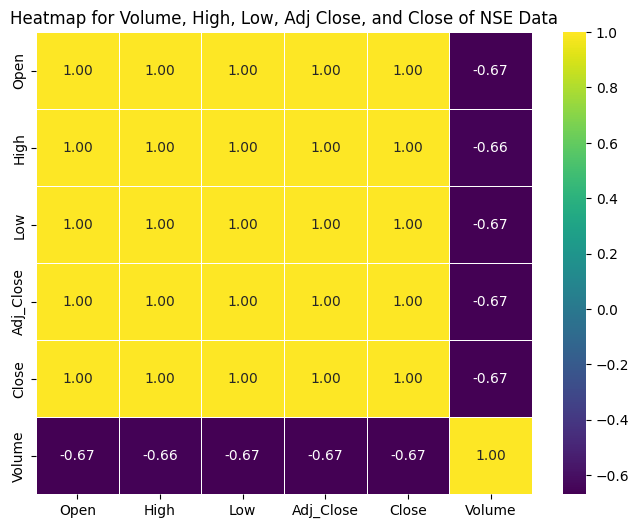

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specific columns for the heatmap
columns_of_interest = ['Open', 'High', 'Low', 'Adj_Close', 'Close', 'Volume']
data_subset = df[columns_of_interest]

# Calculate the correlation matrix for the selected columns
corr_subset = data_subset.corr()

# Generate a heatmap for the selected subset of data
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_subset, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap for Volume, High, Low, Adj Close, and Close of NSE Data')
plt.show()


### **Conclusion**

The application of **causal inference in finance** has significant implications both for theoretical research and practical applications.

#### **Theoretical Implications:**
On a theoretical level, causal inference enhances our understanding of **financial market dynamics**. It offers valuable insights into how various factors, such as interest rates, inflation, or economic policies, influence market behavior and economic outcomes. This understanding is crucial for developing more accurate financial theories and models, which are better equipped to capture the complexities of real-world markets.

#### **Practical Applications:**
From a practical standpoint, causal inference provides financial analysts, portfolio managers, policymakers, and regulators with essential tools for making **evidence-based decisions**. By identifying the **causal relationships** between variables, stakeholders can develop strategies that are more likely to achieve desired outcomes. For example, understanding the causal impact of central bank policies on inflation or the effects of technological advancements on stock market performance can help guide more effective **policy formulation** and **investment strategies**.

#### **Integration with Big Data and Machine Learning:**
In an era where **big data** and **machine learning** dominate the financial sector, the role of causal inference is becoming increasingly significant. Traditional data analysis methods often struggle to distinguish between causation and correlation, which can lead to incorrect conclusions and suboptimal decision-making. By integrating causal inference techniques with machine learning models, financial professionals can improve the **accuracy** and **predictive power** of their analyses, thus creating more sophisticated and reliable financial tools.

### **Conclusion Summary:**
In conclusion, causal inference is crucial for both refining financial theories and improving real-world decision-making. As financial markets continue to evolve and data becomes more complex, integrating causal analysis with advanced modeling techniques will enhance the quality of financial research, policy-making, and investment strategies.

###**References**

1. **Medium**:  
   Medium provides articles and insights from various professionals, including those on finance, machine learning, and data analysis.  
   [https://medium.com/](https://medium.com/)

2. **Kaggle**:  
   Kaggle is a popular platform for data science and machine learning projects, where users can share datasets, code, and solutions, including finance-related challenges.  
   [https://www.kaggle.com/](https://www.kaggle.com/)

3. **Yahoo Finance**:  
   Yahoo Finance offers financial news, data, and analysis, which is commonly used for tracking stock markets, economic events, and financial research.  
   [https://finance.yahoo.com/](https://finance.yahoo.com/)  


###**License**::-
